In [23]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from pykalman import KalmanFilter
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [24]:
data=pd.read_csv("/kaggle/input/giasmp/GiaSMP.csv" ,encoding="latin-1",sep=";")
#df=df.drop("id",axis=1)
print(data)

           Ngày       1       2       3       4       5       6       7  \
0    01/01/2021   964.4   964.4   964.4   964.4   964.4   964.4   964.4   
1    01/02/2021  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7   
2    01/03/2021   988.4   988.4   988.4   988.4   988.4   988.4   988.4   
3    01/04/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
4    01/05/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
..          ...     ...     ...     ...     ...     ...     ...     ...   
360  27/12/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
361  28/12/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
362  29/12/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
363  30/12/2021  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6   
364  31/12/2021  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6   

          8       9  ...      39      40      41      42      43      44  \
0     964.4   964.4  ..

In [25]:
msv = 2151268029
col1 = msv%16 + 1
col2 = msv%16 + 2
col3 = msv%16 + 3
data_8_9 = data[[str(col1),str(col2),str(col3)]]
data_8_9['date'] = data['Ngày']
data_8_9.head(5)

,14,15,16,date
0,964.4,964.4,964.4,01/01/2021
1,1019.7,1019.7,1019.7,01/02/2021
2,988.4,988.4,988.4,01/03/2021
3,1010.8,1010.8,1010.8,01/04/2021
4,1061.5,1061.5,1061.5,01/05/2021


In [26]:
data_8_9['date'] = data['Ngày']
data_8_9['date'] = pd.to_datetime(data_8_9['date'], format='%d/%m/%Y')

# # EDA(Exploratory Data Analysis)

In [27]:
print("Thông tin tổng quan về dữ liệu:")
data_8_9.info()

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   14      365 non-null    float64       
 1   15      365 non-null    float64       
 2   16      365 non-null    float64       
 3   date    365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [28]:
print("\nThống kê mô tả của dữ liệu:")
data_8_9[['14','15','16']].describe()


Thống kê mô tả của dữ liệu:


,14,15,16
count,365.000000,365.000000,365.000000
mean,1040.314521,1040.321918,1040.326301
std,105.145787,105.144258,105.143470
min,885.700000,885.600000,885.600000
25%,988.400000,988.400000,988.400000
50%,1022.600000,1022.600000,1022.600000
75%,1061.600000,1061.600000,1061.600000
max,1565.500000,1565.500000,1565.500000


In [30]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [31]:
# Lấy dữ liệu từ cột được chọn
selected_data = data.iloc[:, [8,9]]

<Axes: >

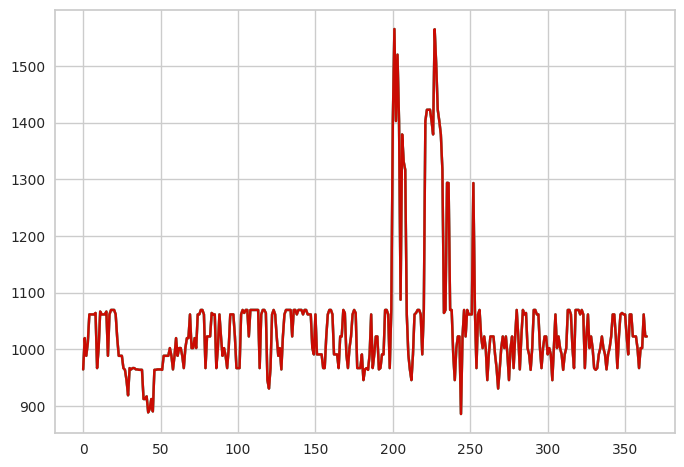

In [32]:
data_8_9[str(col1)].plot(label=f'colum {col1}')
data_8_9[str(col2)].plot(label=f'colum {col2}')
data_8_9[str(col3)].plot(label=f'colum {col3}')

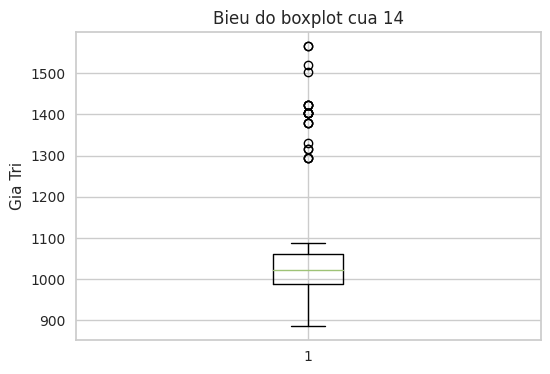

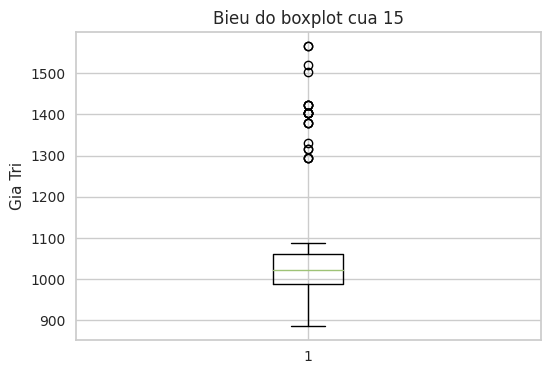

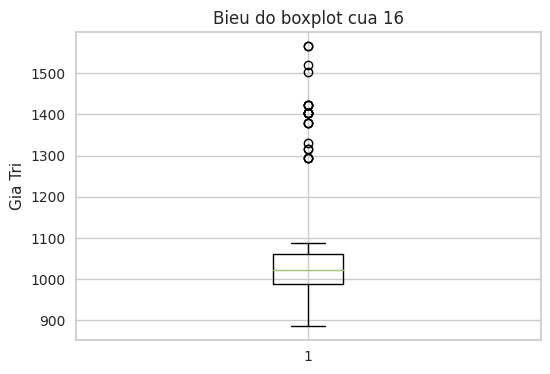

In [33]:
plt.figure(figsize=(6,4))
plt.boxplot(data_8_9[str(col1)])
plt.title(f'Bieu do boxplot cua {col1}')
plt.ylabel('Gia Tri')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(data_8_9[str(col2)])
plt.title(f'Bieu do boxplot cua {col2}')
plt.ylabel('Gia Tri')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(data_8_9[str(col3)])
plt.title(f'Bieu do boxplot cua {col3}')
plt.ylabel('Gia Tri')
plt.show()

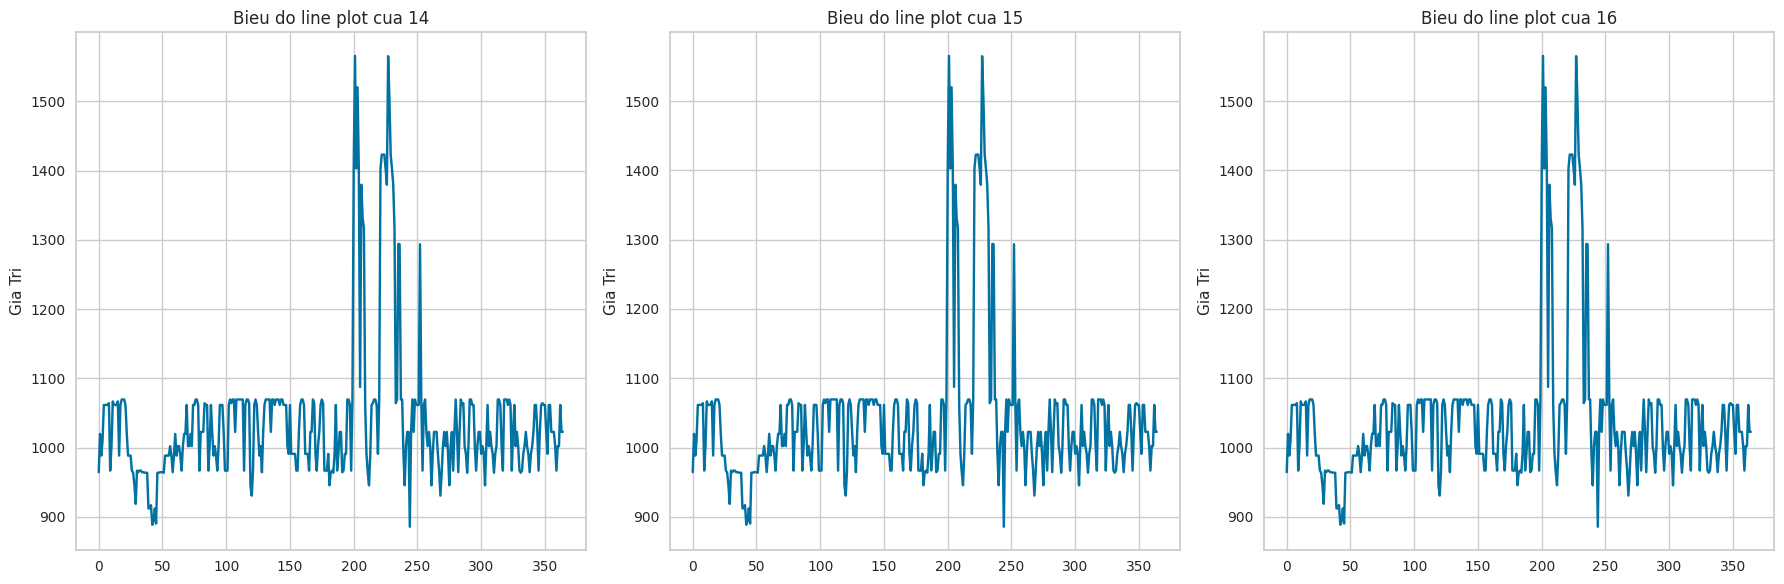

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  

axs[0].plot(data_8_9[str(col1)])
axs[0].set_title(f'Bieu do line plot cua {str(col1)}')


axs[1].plot(data_8_9[str(col2)])
axs[1].set_title(f'Bieu do line plot cua {str(col2)}')

axs[2].plot(data_8_9[str(col3)])
axs[2].set_title(f'Bieu do line plot cua {str(col3)}')


for ax in axs:
    ax.set_ylabel('Gia Tri')

plt.tight_layout()
plt.show()

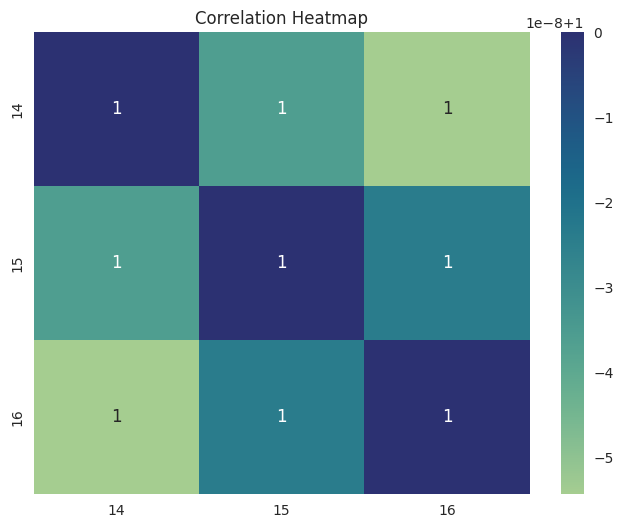

In [35]:
col1, col2, col3 = '14', '15','16'

# Tạo một DataFrame với các cột đã chọn
selected_columns = [str(col1), str(col2), str(col3)]
data_8_9_corr = data_8_9[selected_columns].corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(data_8_9_corr, annot=True, cmap="crest")
plt.title('Correlation Heatmap')
plt.show()

# GaussianMixture,KMeans,DBSCAN

TÌm cụm tối ưu Kmeans


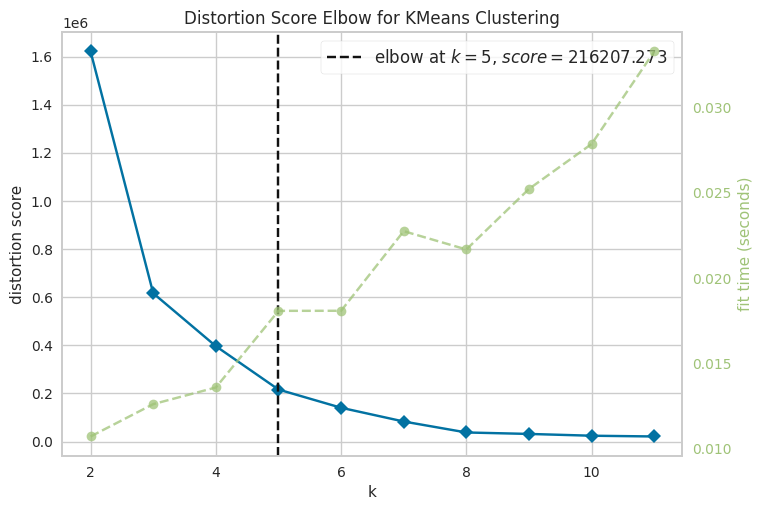

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
from yellowbrick.cluster import KElbowVisualizer
print('TÌm cụm tối ưu Kmeans')
selected_data_2d = selected_data.values
kmeans = KMeans(random_state=23, n_init=10)
Elbow_M = KElbowVisualizer(kmeans, k=(2, 12))
Elbow_M.fit(selected_data_2d)
Elbow_M.show()

In [37]:
k = 5
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(selected_data.values)
gmm_labels = gmm.predict(selected_data.values)
# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(selected_data.values)
kmeans_labels = kmeans.predict(selected_data.values)
# Thực hiện DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(selected_data.values)
# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)
# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col1},{col2} để phân tích.")
print(f"Sử dụng Gaussian Mixture Model với số components là {k}, KMeans clustering với số clusters là {k}, và DBSCAN để phân tích dữ liệu.")

Gaussian Mixture Model labels:
[4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 1 3 1 3 1 4 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 1
 1 1 1 1 1 3 3 1 1 1 1 4 4 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4]

KMeans labels:
[4 0 0 0 2 2 2 2 2 4 0 2 2 2 2 2 0 2 2 2 2 2 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 4 0 0 0 0 0 0 4 0 0 0 2 0 0 0 0
 2 2 2 2 2 4 0 0 0 2 2 2 4 0 2 0 0 0 0 4 0 2 2 2 0 4 4 4 2 2 2

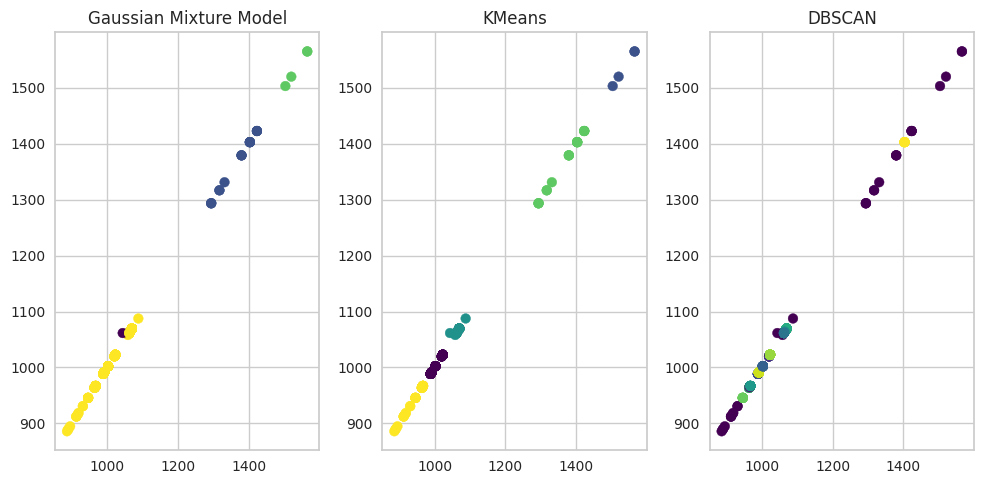

In [38]:
import matplotlib.pyplot as plt
# Biểu đồ Gaussian Mixture Model
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
# Biểu đồ KMeans
plt.subplot(1, 3, 2)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans')
# Biểu đồ DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')
plt.tight_layout()
plt.show()

# Khởi tạo bộ lọc Kalman
 

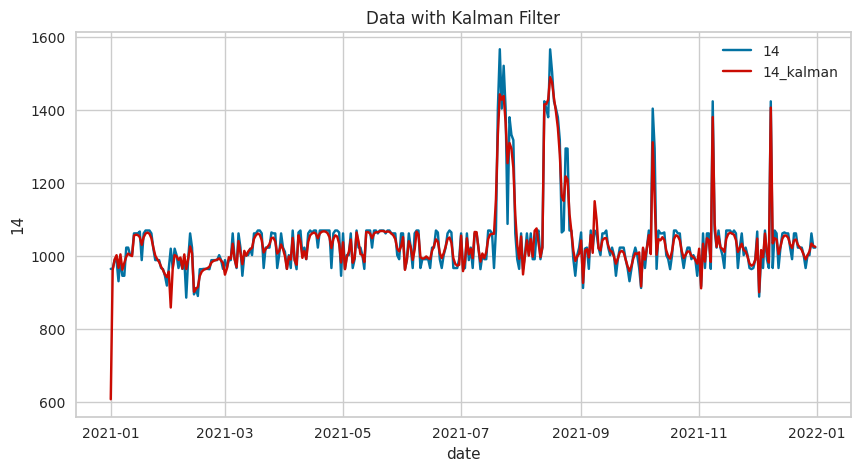

In [39]:

kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)


# Áp dụng bộ lọc Kalman cho từng cột dữ liệu
data_8_9[f'{col1}_kalman'] = kf.smooth(data_8_9[str(col1)].values)[0]
data_8_9[f'{col2}_kalman'] = kf.smooth(data_8_9[str(col2)].values)[0]
data_8_9[f'{col3}_kalman'] = kf.smooth(data_8_9[str(col3)].values)[0]



import numpy as np


# Trực quan hóa kết quả sau khi áp dụng bộ lọc Kalman
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(ax=ax, data=data_8_9, x="date", y=str(col1), label=col1, color ='b')
sns.lineplot(ax=ax, data=data_8_9, x="date", y=f'{col1}_kalman', label=f'{col1}_kalman', color ='r')
plt.title('Data with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()